# Development of Emotion and Reasoning in the General Speeches of the United Nations: A text-based machine learning approach
## Script 2: Figures & Tables

Run Script 0 and 1 beforehand in order to create the proper folder structure and implement the data.

### Description: 
#### This file creates the following figures

Descriptive Figures
- Frequency of speeches by year
- Speech Length over Time
- Share of female and male speakers
- Share of position by speakers

Result Figures
- Emotionaliy over time (Overall)
- Emotionality over time  by permanent Security Council Membership
- Emotionality over time  by permanent Security Council Members
- Emotionality over time  by Gender
- Emotionality over time  by English as official language
- Emotionality over time  by Position
- Cosine Similarity of Corpus Words to the Centorids

### Set Up & Load Data

In [7]:
# == Import libraries for data processing and visualization ==
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os
import joblib
import pandas as pd
from scipy import stats
from tabulate import tabulate
import textwrap
from matplotlib.lines import Line2D
from gensim.models import Word2Vec
from wordcloud import WordCloud
import random
from scipy.spatial.distance import cosine
import numpy as np
import ast

# == Set Working Directory ==

# --- Set base path to project root ---
base_path = Path.cwd().parent  # project root
print(f"Project root set to: {base_path}")

# === Define Folder Paths ===

data_c = base_path / "data"
data_results = data_c / 'results'
data_temp = data_c / 'temp'
data_freq = data_c / 'freq'
data_dict = data_c / 'dictionaries'
data_models = data_c / 'models'
fig_dir = base_path / 'fig'

# === Load data ===
os.chdir(data_results)
un_corpus_scored = pd.read_csv(
    os.path.join(data_results, "un_corpus_scored.csv"),
    sep=';', 
    encoding='utf-8'
)

affect_dic = joblib.load(os.path.join(data_dict, 'dictionary_affect.pkl'))
cognition_dic = joblib.load(os.path.join(data_dict, 'dictionary_cognition.pkl'))

w2v = Word2Vec.load(str(data_models / "w2v-vectors_8_300.pkl"))
word_vectors = w2v.wv

affect_centroid = joblib.load(os.path.join(data_c, 'centroids', 'affect_centroid.pkl'))
cognition_centroid = joblib.load(os.path.join(data_c, 'centroids', 'cog_centroid.pkl'))

# == Define Global Plotting Settings ===

FIGSIZE = (12, 6)
LINEWIDTH = 2
MARKER = None

# Grid style
GRID_STYLE = "whitegrid"
sns.set_style(GRID_STYLE)

# X-axis ticks
TICK_YEARS = [1946] + list(range(1950, 2025, 5))
if 2024 not in TICK_YEARS:
    TICK_YEARS.append(2024)
XTICK_ROTATION = 45

# Font sizes
AXIS_LABEL_FONT_SIZE = 14     
TICK_LABEL_FONT_SIZE = 14      
LEGEND_FONT_SIZE = 12         

# Tick Settings 
TICK_LENGTH = 5
TICK_WIDTH = 2
TICK_COLOR = 'black'
TICK_DIRECTION = 'out'

# Y-axis range for primary axis (y1)
Y_RANGE_EMOTIONALITY = (0.5, 1.1)

# Y-axis for second axis (y2)
AX_SET_YLIM = 0
AX_SET_Y_MARGIN = 0
SECOND_Y_AXIS_BOTTOM = 0

# Spines & Grid Lines
SPINE_COLOR = 'darkgrey'
SPINE_WIDTH = 1.5
GRID_COLOR = 'darkgrey'
GRID_WIDTH = 1.0


# Legend settings
LEGEND_LOC = "upper center"
LEGEND_BBOX = (0.5, -0.15)
LEGEND_NCOL = 3     

# Layout
TIGHT_LAYOUT_RECT = [0, 0, 1, 1]

# Despine options
DESPINE_SETTINGS = dict(left=True, right=True, top=True, bottom=False)

# Note
FIG_NOTE_FONT = dict(ha='center', fontsize=14, fontstyle='italic')

# Color Palette
CUSTOM_COLORS = ['#004260', '#50822E', '#f2c80c',
                 #'#F69B2D', 
                 '#E4003A', '#D95F02']

Project root set to: C:\Users\sarah\Downloads\TESTRUN


In [9]:
un_corpus_scored.head()

,filename,speech,country_code,year,country_name,speech_length_words,english_official_language,security_council_permanent,speaker_name,position,gender_dummy,speech_label,speech_preprocessed,speech_length_preprocessed,speech_final,speech_length_final,affect_d,cognition_d,score
0,ARG_01_1946.txt,At the resumption of the first session of the ...,ARG,1946,Argentina,3364,0,0,Mr. Arce,NaN,0.0,Argentina (1946),"['resumpt', 'argentin', 'renounc', 'decis', 's...",354,"['resumpt', 'argentin', 'renounc', 'decis', 's...",339,0.962741,0.639450,0.762382
1,AUS_01_1946.txt,The General Assembly of the United Nations is ...,AUS,1946,Australia,4531,0,0,Mr. Makin,NaN,0.0,Australia (1946),"['exercis', 'respons', 'charter', 'problem', '...",360,"['exercis', 'respons', 'charter', 'problem', '...",360,1.260413,0.600411,0.528432
2,BEL_01_1946.txt,The principal organs of the United Nations hav...,BEL,1946,Belgium,2501,1,0,Mr. Van Langenhove,NaN,0.0,Belgium (1946),"['charter', 'respons', 'mainten', 'consider', ...",270,"['charter', 'respons', 'mainten', 'consider', ...",269,1.164309,0.677347,0.631829
3,BLR_01_1946.txt,As more than a year has elapsed since the Unit...,BLR,1946,Belarus,3055,0,0,Mr. Kiselev,NaN,0.0,Belarus (1946),"['elaps', 'charter', 'san', 'stabl', 'charter'...",383,"['elaps', 'charter', 'san', 'stabl', 'charter'...",380,0.807538,0.805428,0.998234
4,BOL_01_1946.txt,Coming to this platform where so many distingu...,BOL,1946,Bolivia,1501,0,0,Mr. Costa du Rels,NaN,0.0,Bolivia (1946),"['eloqu', 'preced', 'profit', 'tribut', 'ladi'...",146,"['eloqu', 'preced', 'profit', 'tribut', 'ladi'...",142,0.522803,0.576300,1.037576


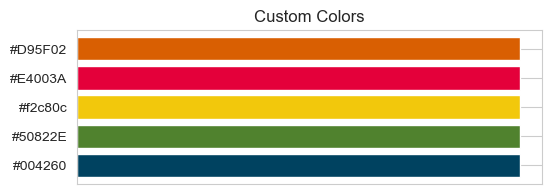

In [11]:
plt.figure(figsize=(6, 2))
for i, color in enumerate(CUSTOM_COLORS):
    plt.barh(y=i, width=1, color=color)
plt.yticks(range(len(CUSTOM_COLORS)), CUSTOM_COLORS)
plt.xticks([])
plt.title("Custom Colors")
plt.show()

## Figures

### Figure: Frequency of speeches by year

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


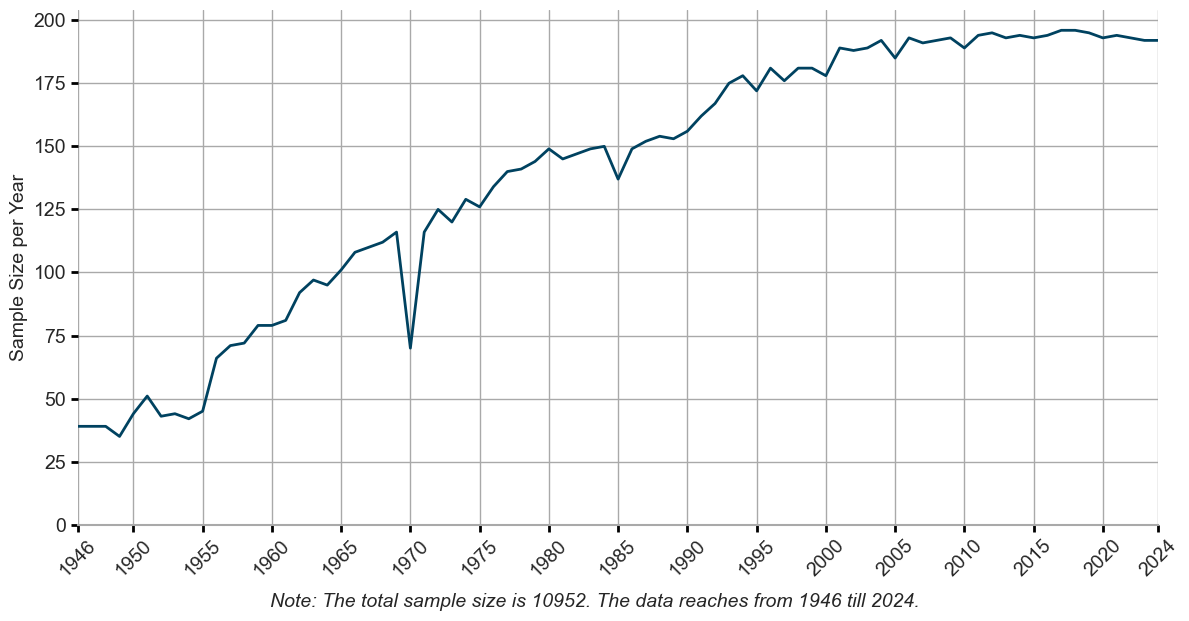

In [15]:
# === Overall Sample Size per Year Plot ===

overall_sample_size_per_year = un_corpus_scored['year'].value_counts().sort_index()
overall_total = overall_sample_size_per_year.sum()

fig, ax = plt.subplots(figsize=FIGSIZE)

sns.lineplot(
    x=overall_sample_size_per_year.index,
    y=overall_sample_size_per_year.values,
    marker=MARKER,
    color=CUSTOM_COLORS[0],
    linewidth=LINEWIDTH,
    ax=ax
)

ax.set_xlabel("")
ax.set_ylabel("Sample Size per Year", fontsize=AXIS_LABEL_FONT_SIZE)

ax.set_ylim(bottom=AX_SET_YLIM)
ax.margins(y=AX_SET_Y_MARGIN)

ax.set_xlim(1946, 2024)
ax.set_xticks(TICK_YEARS)
ax.set_xticklabels(TICK_YEARS, rotation=XTICK_ROTATION)

ax.tick_params(
    axis='x', which='both', bottom=True, top=False,
    direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH, color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE
)
ax.tick_params(
    axis='y', which='both', left=True, right=False,
    direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH, color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE
)

ax.spines['left'].set_color(SPINE_COLOR)
ax.spines['left'].set_linewidth(SPINE_WIDTH)
ax.spines['bottom'].set_color(SPINE_COLOR)
ax.spines['bottom'].set_linewidth(SPINE_WIDTH)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.yaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)
ax.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)

sns.despine(**DESPINE_SETTINGS)

plt.figtext(
    0.5, -0.02,
    f"Note: The total sample size is {overall_total}. The data reaches from 1946 till 2024.",
    **FIG_NOTE_FONT
)

plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'frequency_by_year.png'), bbox_inches='tight')
plt.show()

pd.reset_option('display.max_rows')

In [17]:
# Get the first and last value
pd.set_option('display.max_rows', None)
overall_sample_size_per_year

# Show only the first and last year
print(overall_sample_size_per_year.head(1))
print(overall_sample_size_per_year.tail(1))

year
1946    39
Name: count, dtype: int64
year
2024    192
Name: count, dtype: int64


### Figure: Length of Speeches over time (BEOFRE PREPROCESSING)

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

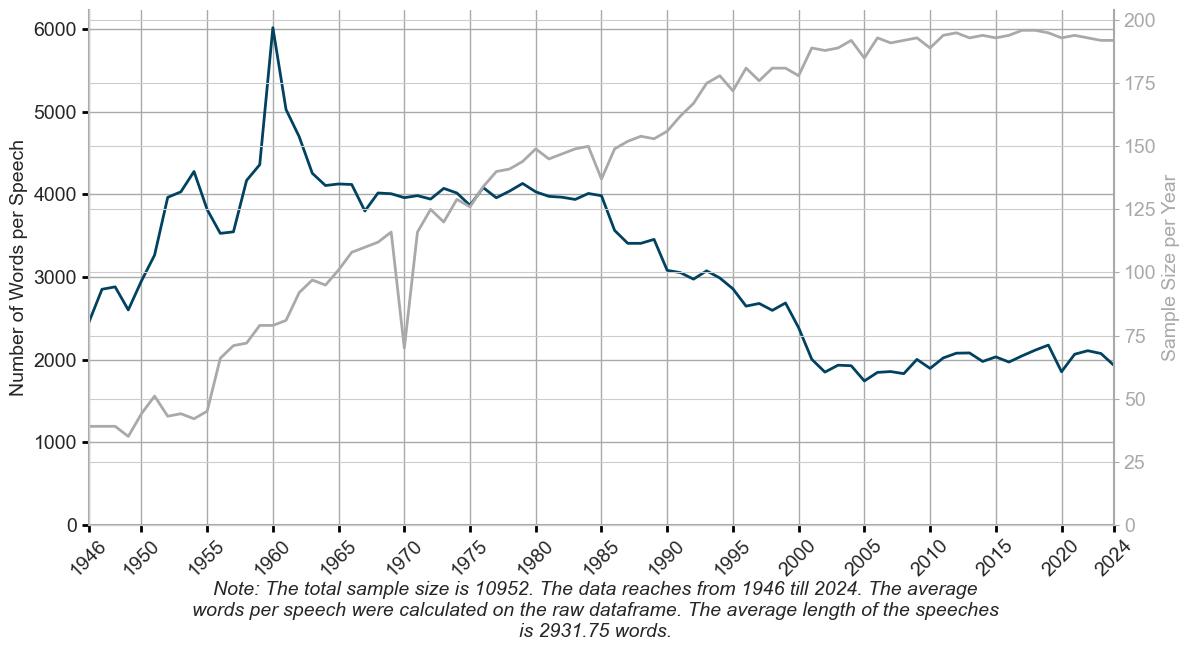

In [22]:
# === Average Speech Length per Year Plot ===

speech_length_words = un_corpus_scored.groupby("year")["speech_length_words"].mean()

fig, ax1 = plt.subplots(figsize=FIGSIZE)

sns.lineplot(
    x=speech_length_words.index,
    y=speech_length_words.values,
    color=CUSTOM_COLORS[0], 
    linewidth=LINEWIDTH,
    ax=ax1
)

ax1.set_xlabel("")
ax1.set_ylabel("Number of Words per Speech", fontsize=AXIS_LABEL_FONT_SIZE)

ax1.tick_params(labelsize=TICK_LABEL_FONT_SIZE)

ax1.set_ylim(bottom=AX_SET_YLIM)
ax1.margins(y=AX_SET_Y_MARGIN)

ax1.set_xlim(1946, 2024)
ax1.set_xticks(TICK_YEARS)
ax1.set_xticklabels(TICK_YEARS, rotation=XTICK_ROTATION)

ax1.tick_params(
    axis='x', which='both', bottom=True, top=False,
    direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH, color=TICK_COLOR
)
ax1.tick_params(
    axis='y', which='both', left=True, right=False,
    direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH, color=TICK_COLOR
)

ax1.spines['left'].set_color(SPINE_COLOR)
ax1.spines['left'].set_linewidth(SPINE_WIDTH)
ax1.spines['bottom'].set_color(SPINE_COLOR)
ax1.spines['bottom'].set_linewidth(SPINE_WIDTH)
ax1.spines['top'].set_visible(False)

# Grid lines
ax1.yaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)
ax1.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)

# === Right y-axis: sample size in dark grey ===
ax2 = ax1.twinx()
sns.lineplot(
    x=overall_sample_size_per_year.index,
    y=overall_sample_size_per_year.values,
    color='darkgrey',
    linewidth=LINEWIDTH,
    ax=ax2
)
ax2.set_ylabel("Sample Size per Year", color='darkgrey', fontsize=AXIS_LABEL_FONT_SIZE)
ax2.tick_params(axis='y', colors='darkgrey', labelsize=TICK_LABEL_FONT_SIZE)
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color(SPINE_COLOR)
ax2.spines['right'].set_linewidth(SPINE_WIDTH)

sns.despine(left=False, right=False, top=True, bottom=False)

note_text = (
    f"Note: The total sample size is {overall_total}. "
    f"The data reaches from 1946 till 2024. "
    f"The average words per speech were calculated on the raw dataframe. "
    f"The average length of the speeches is 2931.75 words."
)

wrapped_text = "\n".join(textwrap.wrap(note_text, width=90))

plt.figtext(0.5, -0.07, wrapped_text, **FIG_NOTE_FONT)

plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'speech_length_by_year.png'), bbox_inches='tight')
plt.show()

### Figure: Share of female speakers

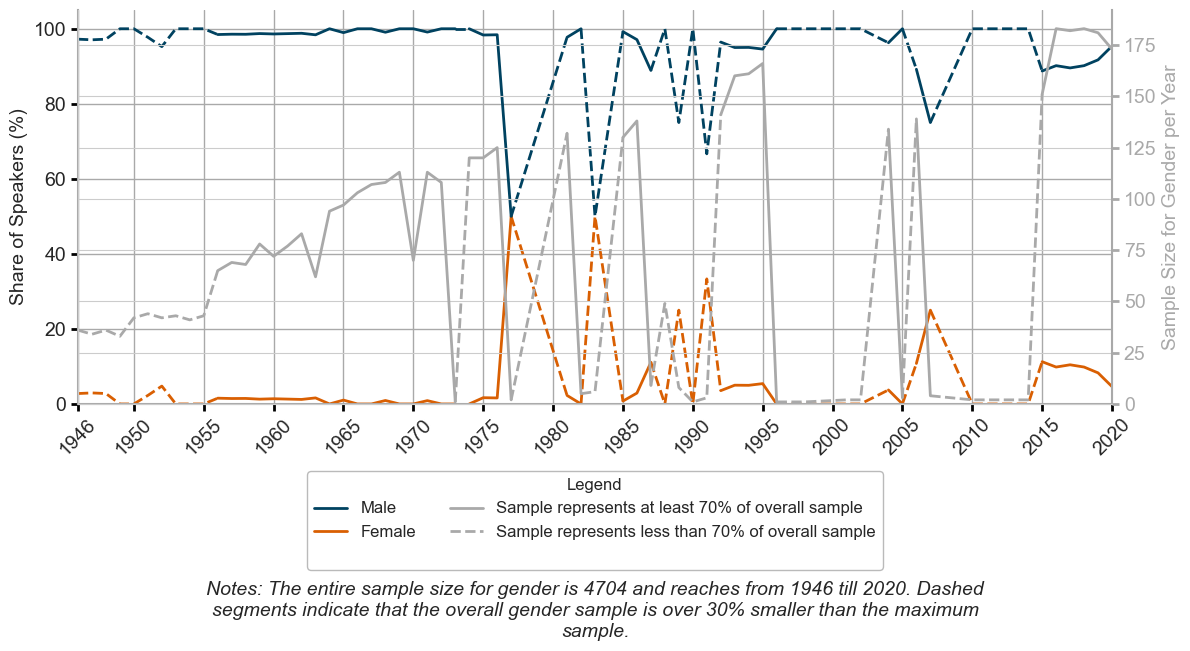

In [27]:
# === Share of Female and Male Speakers by Year ===
df_gender = un_corpus_scored[un_corpus_scored['gender_dummy'].isin([0, 1])]

# Percentage share of women and men per year 
female_percent = df_gender.groupby('year')['gender_dummy'].mean() * 100
male_percent = 100 - female_percent

gender_sample_size_per_year = df_gender.groupby('year')['gender_dummy'].count()
gender_total = gender_sample_size_per_year.sum()

# Threshold for conditional lines
threshold = 0.3 * gender_sample_size_per_year.max()  # dashed if < 30% of max sample

# Function for conditional line plotting 
def plot_conditional_line(ax, x, y, reference, threshold, color, linewidth=LINEWIDTH):
    x, y, reference = list(x), list(y), list(reference)
    start_idx = 0
    current_style = '-' if reference[0] >= threshold else '--'
    for i in range(1, len(y)):
        new_style = '-' if reference[i] >= threshold else '--'
        if new_style != current_style:
            ax.plot(x[start_idx:i+1], y[start_idx:i+1], color=color, linewidth=linewidth, linestyle=current_style)
            start_idx = i
            current_style = new_style
    ax.plot(x[start_idx:], y[start_idx:], color=color, linewidth=linewidth, linestyle=current_style)

fig, ax1 = plt.subplots(figsize=FIGSIZE)

x = female_percent.index
female_y = female_percent.values
male_y = male_percent.values
ref = gender_sample_size_per_year.reindex(x).fillna(0).values  


plot_conditional_line(ax1, x, female_y, reference=ref, threshold=threshold, color=CUSTOM_COLORS[4])
plot_conditional_line(ax1, x, male_y, reference=ref, threshold=threshold, color=CUSTOM_COLORS[0])

ax1.set_xlabel("")
ax1.set_ylabel("Share of Speakers (%)", fontsize=AXIS_LABEL_FONT_SIZE)
ax1.set_ylim(bottom=AX_SET_YLIM)
ax1.margins(y=AX_SET_Y_MARGIN)
ax1.set_xlim(1946, 2020)

tick_years = [1946] + list(range(1950, 2021, 5))
if 2020 not in tick_years:
    tick_years.append(2020)
ax1.set_xticks(tick_years)
ax1.set_xticklabels(tick_years, rotation=XTICK_ROTATION, fontsize=TICK_LABEL_FONT_SIZE)

ax1.tick_params(axis='y', which='both', left=True, right=False, direction=TICK_DIRECTION,
                length=TICK_LENGTH, width=TICK_WIDTH, color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE)
ax1.tick_params(axis='x', which='both', bottom=True, top=False, direction=TICK_DIRECTION,
                length=TICK_LENGTH, width=TICK_WIDTH, color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE)

ax1.spines['left'].set_color(SPINE_COLOR)
ax1.spines['left'].set_linewidth(SPINE_WIDTH)
ax1.spines['bottom'].set_color(SPINE_COLOR)
ax1.spines['bottom'].set_linewidth(SPINE_WIDTH)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)


ax1.yaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)
ax1.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)

ax2 = ax1.twinx()
x2 = gender_sample_size_per_year.index
y2 = gender_sample_size_per_year.values
plot_conditional_line(ax2, x2, y2, reference=y2, threshold=threshold, color='darkgrey')

ax2.set_ylabel("Sample Size for Gender per Year", color='darkgrey', fontsize=AXIS_LABEL_FONT_SIZE)
ax2.tick_params(axis='y', colors='darkgrey', direction=TICK_DIRECTION,
                length=TICK_LENGTH, width=TICK_WIDTH, labelsize=TICK_LABEL_FONT_SIZE)
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color(SPINE_COLOR)
ax2.spines['right'].set_linewidth(SPINE_WIDTH)
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

sns.despine(left=False, right=False, top=True, bottom=False)

legend_handles = [
    # Gender lines
    Line2D([0], [0], color=CUSTOM_COLORS[0], lw=LINEWIDTH, label='Male'),
    Line2D([0], [0], color=CUSTOM_COLORS[4], lw=LINEWIDTH, label='Female'),
    
    # Spacer
    Line2D([0], [0], color='white', lw=0, label=''), 
    
    # Sample size explanation
    Line2D([0], [0], color='darkgrey', lw=LINEWIDTH, linestyle='-', 
           label='Sample represents at least 70% of overall sample'),
    Line2D([0], [0], color='darkgrey', lw=LINEWIDTH, linestyle='--', 
           label='Sample represents less than 70% of overall sample')
]

ax1.legend(
    handles=legend_handles,
    title="Legend",
    title_fontsize=LEGEND_FONT_SIZE,
    fontsize=LEGEND_FONT_SIZE,
    loc=LEGEND_LOC,
    bbox_to_anchor=LEGEND_BBOX,
    ncol=2,  # you can adjust to 1 if you want vertical stacking
    frameon=True,
    edgecolor=SPINE_COLOR,
    facecolor='white'
)

note_text = (
    f"Notes: The entire sample size for gender is {gender_total} and reaches from 1946 till 2020. "
    f"Dashed segments indicate that the overall gender sample is over 30% smaller than the maximum sample."
)
wrapped_text = "\n".join(textwrap.wrap(note_text, width=90))
plt.figtext(0.5, -0.07, wrapped_text, **FIG_NOTE_FONT)

# --- Save & Show ---
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'share_female_male_speakers_by_year.png'), bbox_inches='tight')
plt.show()


### Figure: Share of position by speakers

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

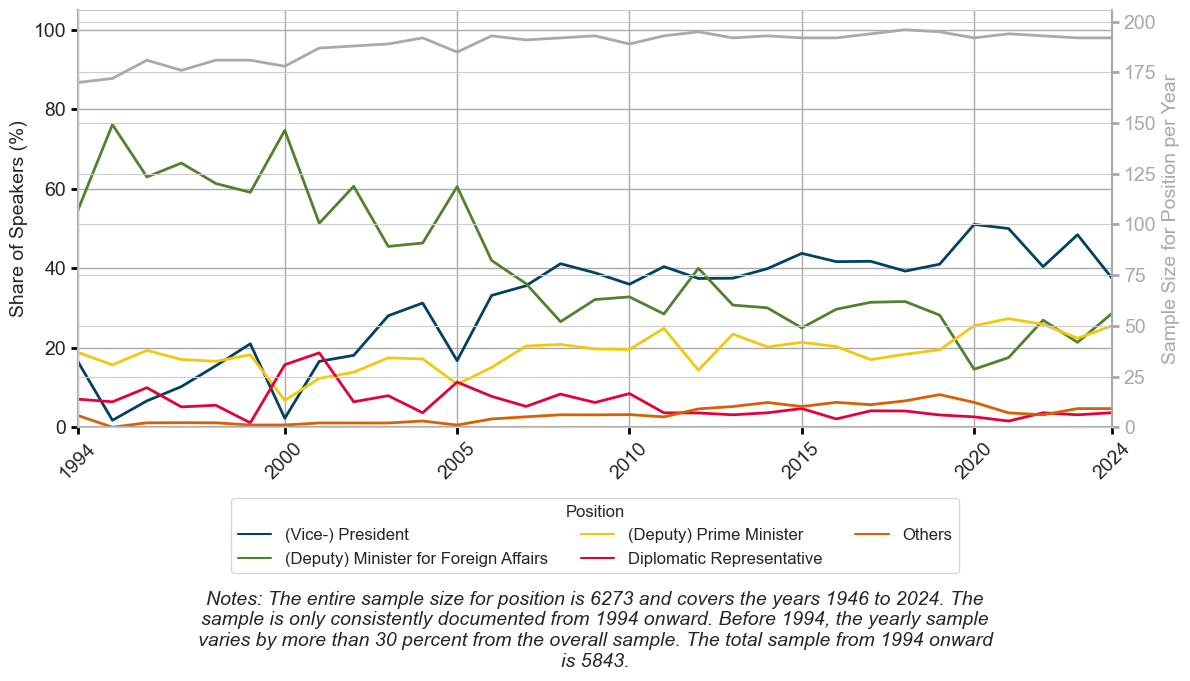

In [29]:
merge_to_others = ["Head of State", "Monarch", "Head of Government"]
un_corpus_scored["position"] = un_corpus_scored["position"].replace(merge_to_others, "Others")

# Counts per year and position
position_counts = (
    un_corpus_scored.groupby(['year', 'position'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

# Sample size per year (positions subset)
position_sample_size_per_year = position_counts.sum(axis=1)
position_total = position_sample_size_per_year.sum()

# Percentages per year per position
top_positions = [
    '(Vice-) President', 
    '(Deputy) Minister for Foreign Affairs',
    '(Deputy) Prime Minister', 
    'Diplomatic Representative', 
    'Others'
]

position_percentage = (
    position_counts[top_positions]
    .div(position_counts.sum(axis=1), axis=0)
    .fillna(0) * 100
)

position_percentage_long = (
    position_percentage
    .reset_index()
    .melt(id_vars="year", var_name="position", value_name="percentage")
)

fig, ax1 = plt.subplots(figsize=FIGSIZE)

sns.lineplot(
    data=position_percentage_long,
    x="year",
    y="percentage",
    hue="position",
    palette=CUSTOM_COLORS,
    linewidth=LINEWIDTH,
    ax=ax1
)

ax1.set_ylabel("Share of Speakers (%)", fontsize=AXIS_LABEL_FONT_SIZE)
ax1.set_xlabel("")

ax1.tick_params(
    axis='y',
    direction=TICK_DIRECTION,
    length=TICK_LENGTH,
    width=TICK_WIDTH,
    color=TICK_COLOR,
    labelsize=TICK_LABEL_FONT_SIZE
)
ax1.tick_params(
    axis='x',
    which='both',
    bottom=True,
    top=False,
    direction=TICK_DIRECTION,
    length=TICK_LENGTH,
    width=TICK_WIDTH,
    color=TICK_COLOR,
    labelsize=TICK_LABEL_FONT_SIZE
)

ax1.spines['left'].set_color(SPINE_COLOR)
ax1.spines['left'].set_linewidth(SPINE_WIDTH)
ax1.spines['bottom'].set_color(SPINE_COLOR)
ax1.spines['bottom'].set_linewidth(SPINE_WIDTH)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.yaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)
ax1.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)
sns.despine(left=False, right=False, top=True, bottom=False)

ax1.set_ylim(bottom=0)

ax2 = ax1.twinx()
sns.lineplot(
    x=position_sample_size_per_year.index,
    y=position_sample_size_per_year.values,
    color="darkgrey",
    linewidth=LINEWIDTH,
    ax=ax2
)

ax2.set_ylabel("Sample Size for Position per Year", color="darkgrey", fontsize=AXIS_LABEL_FONT_SIZE)
ax2.tick_params(
    axis='y',
    colors='darkgrey',
    direction=TICK_DIRECTION,
    length=TICK_LENGTH,
    width=TICK_WIDTH,
    labelsize=TICK_LABEL_FONT_SIZE
)
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color(SPINE_COLOR)
ax2.spines['right'].set_linewidth(SPINE_WIDTH)
ax2.set_ylim(bottom=0)

ax1.set_xlim(1994, 2024)
xtick_years = [2000, 1994] + list(range(2000, 2025, 5))
xtick_years = sorted(set(xtick_years + [2024]))
ax1.set_xticks(xtick_years)
ax1.set_xticklabels(xtick_years, rotation=XTICK_ROTATION, fontsize=TICK_LABEL_FONT_SIZE)

ax1.legend(
    title="Position",
    loc=LEGEND_LOC,
    bbox_to_anchor=LEGEND_BBOX,
    ncol=LEGEND_NCOL,
    fontsize=LEGEND_FONT_SIZE,
    title_fontsize=LEGEND_FONT_SIZE
)

position_total_1994 = position_sample_size_per_year.loc[1994:].sum()


note_text = (
    f"Notes: The entire sample size for position is {position_total} and covers the years 1946 to 2024. "
    f"The sample is only consistently documented from 1994 onward. Before 1994, the yearly sample varies "
    f"by more than 30 percent from the overall sample. The total sample from 1994 onward is {position_total_1994}."
)
wrapped_text = "\n".join(textwrap.wrap(note_text, width=90))
plt.figtext(0.5, -0.12, wrapped_text, **FIG_NOTE_FONT)

plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'share_speaker_positions_by_year_representative_part.png'), bbox_inches='tight')
plt.show()

### Figure: Emotionality over time

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

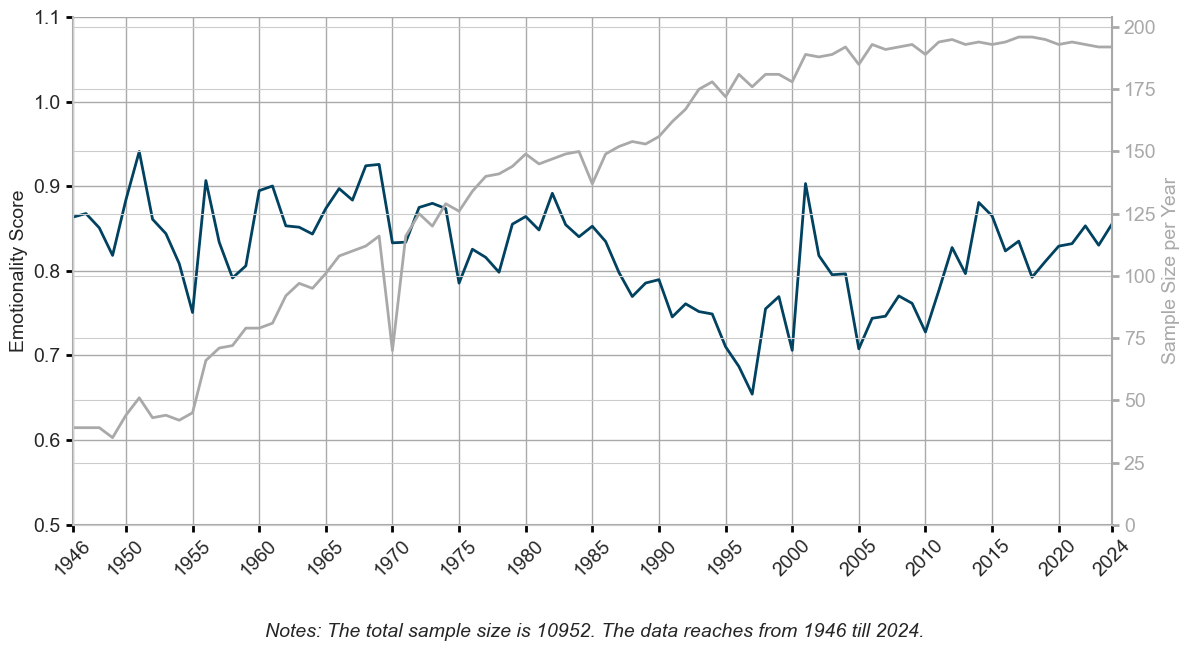

In [31]:
# Mean score per year
score_over_time = un_corpus_scored.groupby('year')['score'].mean()

fig, ax1 = plt.subplots(figsize=FIGSIZE)

x = score_over_time.index
y = score_over_time.values

sns.lineplot(
    x=x,
    y=y,
    marker=MARKER,
    color=CUSTOM_COLORS[0],
    linewidth=LINEWIDTH,
    ax=ax1
)

ax1.set_xlabel("")
ax1.set_ylabel("Emotionality Score", fontsize=AXIS_LABEL_FONT_SIZE)
ax1.set_ylim(Y_RANGE_EMOTIONALITY)
ax1.margins(y=AX_SET_Y_MARGIN)

ax1.set_xlim(1946, 2024)
ax1.set_xticks(TICK_YEARS)
ax1.set_xticklabels(TICK_YEARS, rotation=XTICK_ROTATION, fontsize=TICK_LABEL_FONT_SIZE)

ax1.tick_params(
    axis='y', which='both', left=True, right=False,
    direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH,
    color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE
)
ax1.tick_params(
    axis='x', which='both', bottom=True, top=False,
    direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH,
    color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE
)


ax1.spines['left'].set_color(SPINE_COLOR)
ax1.spines['left'].set_linewidth(SPINE_WIDTH)
ax1.spines['bottom'].set_color(SPINE_COLOR)
ax1.spines['bottom'].set_linewidth(SPINE_WIDTH)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.yaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)
ax1.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)


ax2 = ax1.twinx()
x2 = overall_sample_size_per_year.index
y2 = overall_sample_size_per_year.values

sns.lineplot(
    x=x2,
    y=y2,
    color='darkgrey',
    linewidth=LINEWIDTH,
    ax=ax2
)
ax2.set_ylabel("Sample Size per Year", color='darkgrey', fontsize=AXIS_LABEL_FONT_SIZE)
ax2.tick_params(
    axis='y', colors='darkgrey', direction=TICK_DIRECTION,
    length=TICK_LENGTH, width=TICK_WIDTH, labelsize=TICK_LABEL_FONT_SIZE
)
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color(SPINE_COLOR)
ax2.spines['right'].set_linewidth(SPINE_WIDTH)
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

sns.despine(left=False, right=False, top=True, bottom=False)

note_text = (
    f"Notes: The total sample size is {overall_total}. The data reaches from 1946 till 2024."
)
wrapped_text = "\n".join(textwrap.wrap(note_text, width=100))
plt.figtext(0.5, -0.07, wrapped_text, **FIG_NOTE_FONT)

plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'emotionality_score_over_time.png'), bbox_inches='tight')
plt.show()

### Figure: Emotionality by permanent Security Council Membership

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

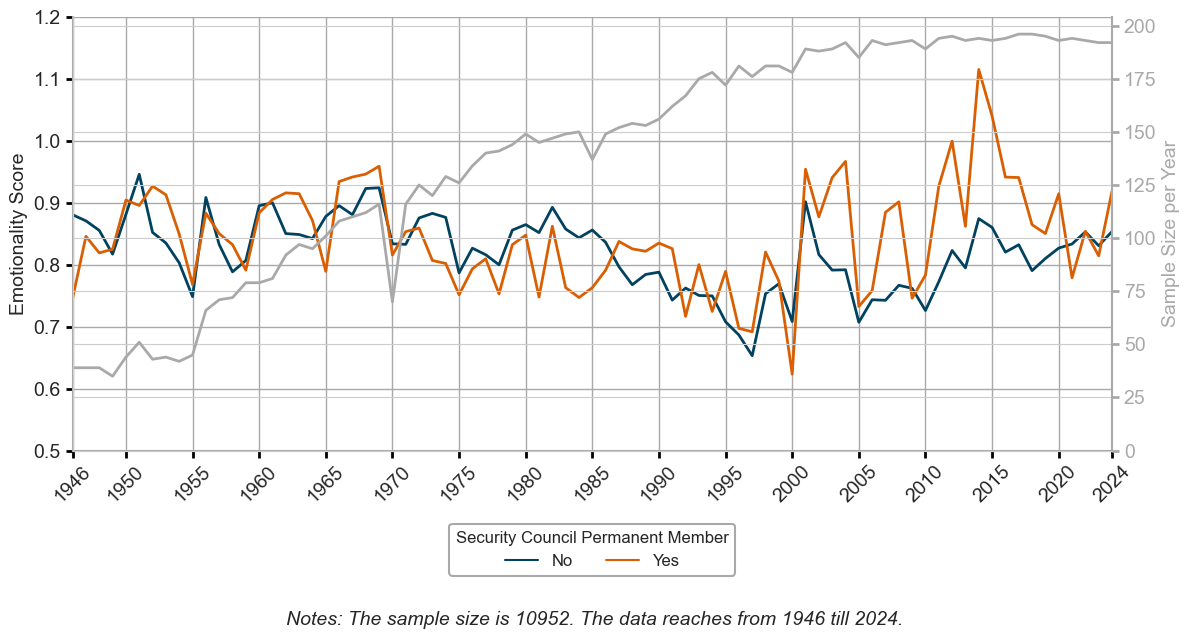

In [34]:
security_council_total = un_corpus_scored['security_council_permanent'].notna().sum()

# Sample size per year (non-missing scores)
security_council_sample_size_per_year = (
    un_corpus_scored.groupby('year')['security_council_permanent'].count()
)

# Mean scores by year and membership
score_over_time_security_council = (
    un_corpus_scored
    .groupby(['year', 'security_council_permanent'])['score']
    .mean()
    .reset_index()
)

score_over_time_security_council['security_council_permanent_label'] = (
    score_over_time_security_council['security_council_permanent']
    .map({0: 'No', 1: 'Yes'})
)

fig, ax1 = plt.subplots(figsize=FIGSIZE)

sns.lineplot(
    data=score_over_time_security_council,
    x='year',
    y='score',
    hue='security_council_permanent_label',
    palette={'No': CUSTOM_COLORS[0], 'Yes': CUSTOM_COLORS[4]},
    linewidth=LINEWIDTH,
    marker=MARKER,
    ax=ax1
)

ax1.set_xlabel("")
ax1.set_ylabel("Emotionality Score", fontsize=AXIS_LABEL_FONT_SIZE)
ax1.set_ylim(0.5,1.2)
ax1.margins(y=AX_SET_Y_MARGIN)

ax1.set_xlim(1946, 2024)
ax1.set_xticks(TICK_YEARS)
ax1.set_xticklabels(TICK_YEARS, rotation=XTICK_ROTATION, fontsize=TICK_LABEL_FONT_SIZE)

ax1.tick_params(
    axis='y', which='both', left=True, right=False,
    direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH,
    color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE
)
ax1.tick_params(
    axis='x', which='both', bottom=True, top=False,
    direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH,
    color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE
)

ax1.spines['left'].set_color(SPINE_COLOR)
ax1.spines['left'].set_linewidth(SPINE_WIDTH)
ax1.spines['bottom'].set_color(SPINE_COLOR)
ax1.spines['bottom'].set_linewidth(SPINE_WIDTH)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.yaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)
ax1.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)

legend = ax1.legend(
    title="Security Council Permanent Member",
    title_fontsize=LEGEND_FONT_SIZE,
    fontsize=LEGEND_FONT_SIZE,
    loc=LEGEND_LOC,
    bbox_to_anchor=LEGEND_BBOX,
    ncol=LEGEND_NCOL,
    frameon=True,
    edgecolor=SPINE_COLOR,
    facecolor='white'
)
legend.get_frame().set_linewidth(SPINE_WIDTH)
legend.get_frame().set_alpha(1)

ax2 = ax1.twinx()
x2 = security_council_sample_size_per_year.index
y2 = security_council_sample_size_per_year.values

sns.lineplot(
    x=x2,
    y=y2,
    color='darkgrey',
    linewidth=LINEWIDTH,
    ax=ax2
)
ax2.set_ylabel("Sample Size per Year", color='darkgrey', fontsize=AXIS_LABEL_FONT_SIZE)
ax2.tick_params(
    axis='y', colors='darkgrey', direction=TICK_DIRECTION,
    length=TICK_LENGTH, width=TICK_WIDTH, labelsize=TICK_LABEL_FONT_SIZE
)
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color(SPINE_COLOR)
ax2.spines['right'].set_linewidth(SPINE_WIDTH)
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

sns.despine(left=False, right=False, top=True, bottom=False)

note_text = (
    f"Notes: The sample size is {security_council_total}. The data reaches from 1946 till 2024."
)
wrapped_text = "\n".join(textwrap.wrap(note_text, width=100))
plt.figtext(0.5, -0.05, wrapped_text, **FIG_NOTE_FONT)

plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(
    os.path.join(fig_dir, 'emotionality_score_over_time_security_council_membership.png'),
    bbox_inches='tight'
)
plt.show()

### Figure: Emotionality for permanent members of the security council

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

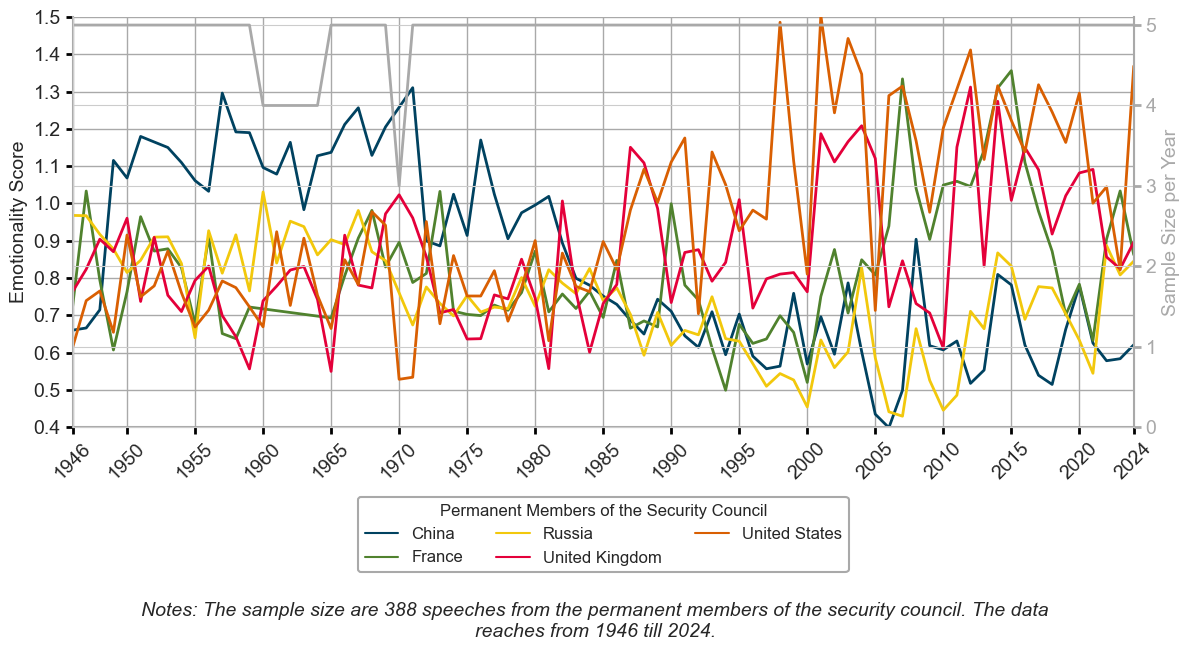

In [36]:
# Filter only Security Council permanent members
permanent_members = un_corpus_scored[un_corpus_scored['security_council_permanent'] == 1]

# Total sample size
permanent_members_total = permanent_members[['score', 'country_name']].dropna().shape[0]

# Sample size per year
permanent_members_sample_size_per_year = permanent_members.groupby('year')['security_council_permanent'].count()

# Mean scores by year and country_name
score_over_time_permanent_members = (
    permanent_members
    .groupby(['year', 'country_name'])['score']
    .mean()
    .reset_index()
)

fig, ax1 = plt.subplots(figsize=FIGSIZE)

sns.lineplot(
    data=score_over_time_permanent_members,
    x='year',
    y='score',
    hue='country_name',
    palette=CUSTOM_COLORS,
    linewidth=2,
    ax=ax1
)

ax1.set_ylabel("Emotionality Score", fontsize=AXIS_LABEL_FONT_SIZE)
ax1.set_xlabel("")
ax1.set_ylim(0.4, 1.5)  # manually set as requested
ax1.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5])

ax1.set_xlim(1946, 2024)
ax1.set_xticks(TICK_YEARS)
ax1.set_xticklabels(TICK_YEARS, rotation=XTICK_ROTATION, fontsize=TICK_LABEL_FONT_SIZE)

# Tick styling
ax1.tick_params(axis='y', which='both', left=True, right=False,
                direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH,
                color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE)
ax1.tick_params(axis='x', which='both', bottom=True, top=False,
                direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH,
                color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE)

ax1.spines['left'].set_color(SPINE_COLOR)
ax1.spines['left'].set_linewidth(SPINE_WIDTH)
ax1.spines['bottom'].set_color(SPINE_COLOR)
ax1.spines['bottom'].set_linewidth(SPINE_WIDTH)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.yaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)
ax1.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)

ax2 = ax1.twinx()
x2, y2 = permanent_members_sample_size_per_year.index, permanent_members_sample_size_per_year.values
sns.lineplot(x=x2, y=y2, color='darkgrey', linewidth=LINEWIDTH, ax=ax2)

ax2.set_ylabel("Sample Size per Year", color='darkgrey', fontsize=AXIS_LABEL_FONT_SIZE)
ax2.tick_params(axis='y', colors='darkgrey', direction=TICK_DIRECTION,
                length=TICK_LENGTH, width=TICK_WIDTH, labelsize=TICK_LABEL_FONT_SIZE)
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color(SPINE_COLOR)
ax2.spines['right'].set_linewidth(SPINE_WIDTH)
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

legend = ax1.legend(
    title="Permanent Members of the Security Council",
    title_fontsize=LEGEND_FONT_SIZE,
    fontsize=LEGEND_FONT_SIZE,
    loc=LEGEND_LOC,
    bbox_to_anchor=LEGEND_BBOX,
    ncol=LEGEND_NCOL,
    frameon=True,
    edgecolor=SPINE_COLOR,
    facecolor='white'
)
legend.get_frame().set_linewidth(SPINE_WIDTH)
legend.get_frame().set_alpha(1)

sns.despine(left=False, right=False, top=True, bottom=False)

note_text = f"Notes: The sample size are {permanent_members_total} speeches from the permanent members of the security council. The data reaches from 1946 till 2024."
wrapped_text = "\n".join(textwrap.wrap(note_text, width=100))
plt.figtext(0.5, -0.07, wrapped_text, **FIG_NOTE_FONT)

plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'emotionality_score_over_time_permanent_members.png'), bbox_inches='tight')
plt.show()


### Figure: Emotionality  by Gender

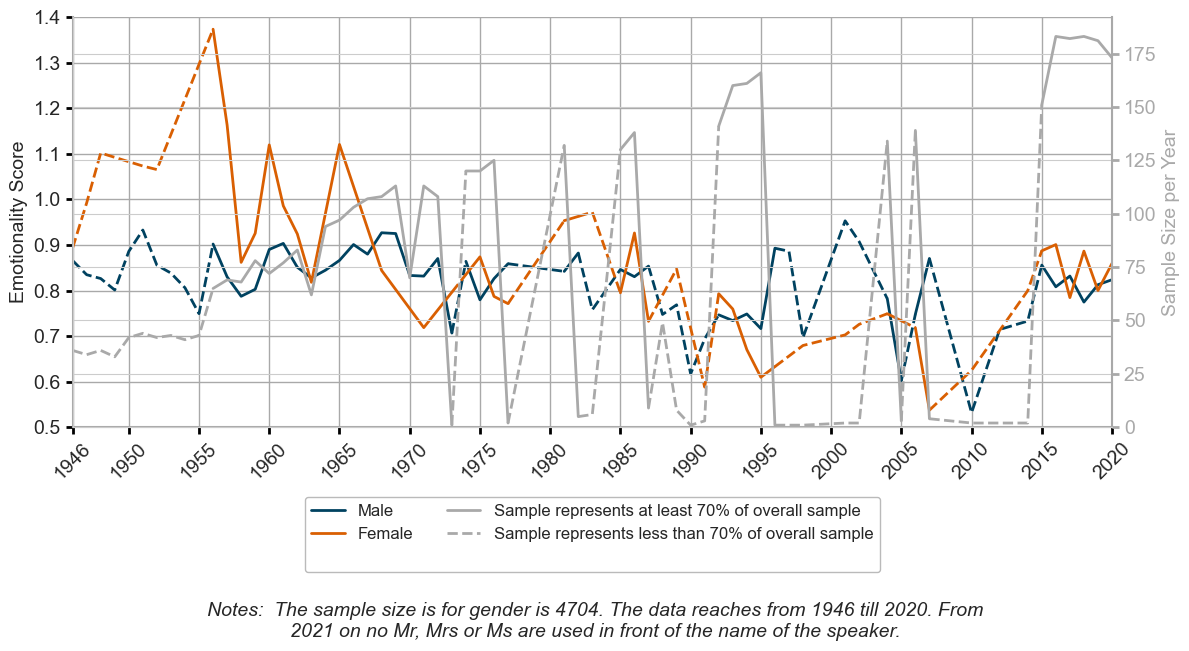

In [38]:
score_over_time_gender = (
    un_corpus_scored
    .groupby(['year', 'gender_dummy'])['score']
    .mean()
    .reset_index()
)
score_over_time_gender['gender_label'] = score_over_time_gender['gender_dummy'].map({0: 'Male', 1: 'Female'})
x_vals = gender_sample_size_per_year.index

male_scores = (
    score_over_time_gender[score_over_time_gender['gender_label']=='Male']
    .set_index('year')['score']
    .reindex(x_vals)
    .interpolate()  # fill gaps for continuous lines
)
female_scores = (
    score_over_time_gender[score_over_time_gender['gender_label']=='Female']
    .set_index('year')['score']
    .reindex(x_vals)
    .interpolate()
)
ref = gender_sample_size_per_year.reindex(x_vals).fillna(0).values

threshold = 0.3 * overall_sample_size_per_year.max()

fig, ax1 = plt.subplots(figsize=FIGSIZE)

# Conditional lines for Male/Female
plot_conditional_line(ax1, x_vals, male_scores.values, reference=ref, threshold=threshold, color=CUSTOM_COLORS[0])
plot_conditional_line(ax1, x_vals, female_scores.values, reference=ref, threshold=threshold, color=CUSTOM_COLORS[4])

# Axes labels, limits, ticks, grids, spines
ax1.set_xlabel("")
ax1.set_ylabel("Emotionality Score", fontsize=AXIS_LABEL_FONT_SIZE)
ax1.set_ylim(0.5,1.4)
ax1.set_xlim(1946, 2020)
# Manually define ticks only for this plot
tick_years = [1946] + list(range(1950, 2020, 5))
if 2020 not in tick_years:
    tick_years.append(2020)

ax1.set_xticks(tick_years)
ax1.set_xticklabels(tick_years, rotation=XTICK_ROTATION, fontsize=TICK_LABEL_FONT_SIZE)
ax1.tick_params(axis='y', which='both', left=True, right=False,
                direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH,
                color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE)
ax1.tick_params(axis='x', which='both', bottom=True, top=False,
                direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH,
                color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE)
ax1.spines['left'].set_color(SPINE_COLOR)
ax1.spines['left'].set_linewidth(SPINE_WIDTH)
ax1.spines['bottom'].set_color(SPINE_COLOR)
ax1.spines['bottom'].set_linewidth(SPINE_WIDTH)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.yaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)
ax1.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)


ax2 = ax1.twinx()
plot_conditional_line(ax2, x_vals, ref, reference=ref, threshold=threshold, color='darkgrey', linewidth=LINEWIDTH)
ax2.set_ylabel("Sample Size per Year", color='darkgrey', fontsize=AXIS_LABEL_FONT_SIZE)
ax2.tick_params(axis='y', colors='darkgrey', direction=TICK_DIRECTION,
                length=TICK_LENGTH, width=TICK_WIDTH, labelsize=TICK_LABEL_FONT_SIZE)
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color(SPINE_COLOR)
ax2.spines['right'].set_linewidth(SPINE_WIDTH)
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

sns.despine(left=False, right=False, top=True, bottom=False)

legend_handles = [
    Line2D([0], [0], color=CUSTOM_COLORS[0], lw=LINEWIDTH, label='Male'),
    Line2D([0], [0], color=CUSTOM_COLORS[4], lw=LINEWIDTH, label='Female'),
    Line2D([0], [0], color='white', lw=0, label=''), 

    Line2D([0], [0], color='darkgrey', lw=LINEWIDTH, linestyle='-', 
           label='Sample represents at least 70% of overall sample'),
    Line2D([0], [0], color='darkgrey', lw=LINEWIDTH, linestyle='--', 
           label='Sample represents less than 70% of overall sample')
]

ax1.legend(
    handles=legend_handles,
    title_fontsize=LEGEND_FONT_SIZE,
    fontsize=LEGEND_FONT_SIZE,
    loc=LEGEND_LOC,
    bbox_to_anchor=LEGEND_BBOX,
    ncol=2,
    frameon=True,
    edgecolor=SPINE_COLOR,
    facecolor='white'
)

note_text = (
    f"Notes:  The sample size is for gender is {gender_total}. The data reaches from 1946 till 2020. "
    f"From 2021 on no Mr, Mrs or Ms are used in front of the name of the speaker."
)
wrapped_text = "\n".join(textwrap.wrap(note_text, width=90))
plt.figtext(0.5, -0.07, wrapped_text, **FIG_NOTE_FONT)

plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'emotionality_score_over_time_gender.png'), bbox_inches='tight')
plt.show()

### Figure: Emotionality by english as official language

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

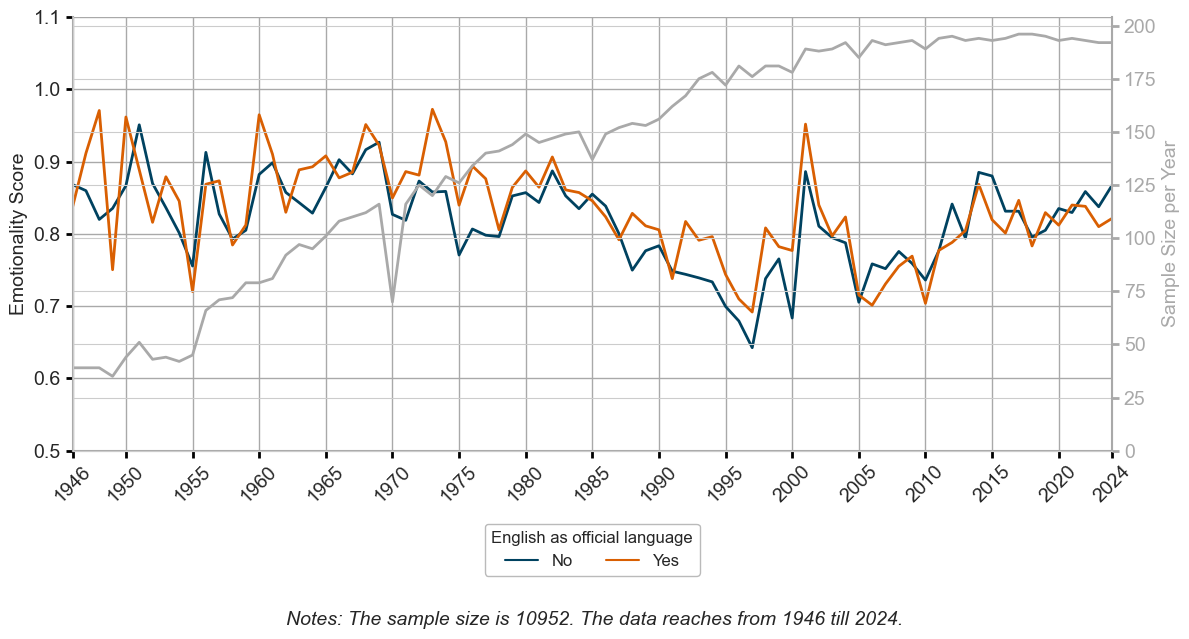

In [40]:
score_over_time_official_language = (
    un_corpus_scored
    .groupby(['year', 'english_official_language'])['score']
    .mean()
    .reset_index()
)
score_over_time_official_language['english_label'] = score_over_time_official_language['english_official_language'].map({0: 'No', 1: 'Yes'})

# PLot
fig, ax1 = plt.subplots(figsize=FIGSIZE)

sns.lineplot(
    data=score_over_time_official_language,
    x='year',
    y='score',
    hue='english_label',
    palette={'No': CUSTOM_COLORS[0], 'Yes': CUSTOM_COLORS[4]},
    linewidth=LINEWIDTH,
    ax=ax1
)

ax1.set_xlabel("")
ax1.set_ylabel("Emotionality Score", fontsize=AXIS_LABEL_FONT_SIZE)
ax1.set_ylim(Y_RANGE_EMOTIONALITY)
ax1.margins(y=AX_SET_Y_MARGIN)
ax1.set_xlim(1946, 2024)

tick_years_plot = [1946] + list(range(1950, 2025, 5))
if 2024 not in tick_years_plot:
    tick_years_plot.append(2024)

ax1.set_xticks(tick_years_plot)
ax1.set_xticklabels(tick_years_plot, rotation=XTICK_ROTATION, fontsize=TICK_LABEL_FONT_SIZE)

ax1.tick_params(axis='y', which='both', left=True, right=False,
                direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH,
                color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE)
ax1.tick_params(axis='x', which='both', bottom=True, top=False,
                direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH,
                color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE)

ax1.spines['left'].set_color(SPINE_COLOR)
ax1.spines['left'].set_linewidth(SPINE_WIDTH)
ax1.spines['bottom'].set_color(SPINE_COLOR)
ax1.spines['bottom'].set_linewidth(SPINE_WIDTH)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.yaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)
ax1.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)

ax2 = ax1.twinx()

x2, y2 = overall_sample_size_per_year.index, overall_sample_size_per_year.values
sns.lineplot(
    x=x2,
    y=y2,
    color='darkgrey',
    linewidth=LINEWIDTH,
    ax=ax2
)

ax2.set_ylabel("Sample Size per Year", color='darkgrey', fontsize=AXIS_LABEL_FONT_SIZE)
ax2.tick_params(axis='y', colors='darkgrey', direction=TICK_DIRECTION,
                length=TICK_LENGTH, width=TICK_WIDTH, labelsize=TICK_LABEL_FONT_SIZE)
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color(SPINE_COLOR)
ax2.spines['right'].set_linewidth(SPINE_WIDTH)
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

ax1.legend(
    title="English as official language",
    title_fontsize=LEGEND_FONT_SIZE,
    fontsize=LEGEND_FONT_SIZE,
    loc=LEGEND_LOC,
    bbox_to_anchor=LEGEND_BBOX,
    ncol=LEGEND_NCOL,
    frameon=True,
    edgecolor=SPINE_COLOR,
    facecolor='white'
)

note_text = (
    f"Notes: The sample size is {overall_total}. The data reaches from 1946 till 2024."
)
wrapped_text = "\n".join(textwrap.wrap(note_text, width=100))
plt.figtext(0.5, -0.05, wrapped_text, **FIG_NOTE_FONT)

sns.despine(left=False, right=False, top=True, bottom=False)
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)

plt.savefig(os.path.join(fig_dir, 'emotionality_score_over_time_english_official_language.png'), bbox_inches='tight')
plt.show()

### Figure: Emotionality by Speaker Position

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you wil

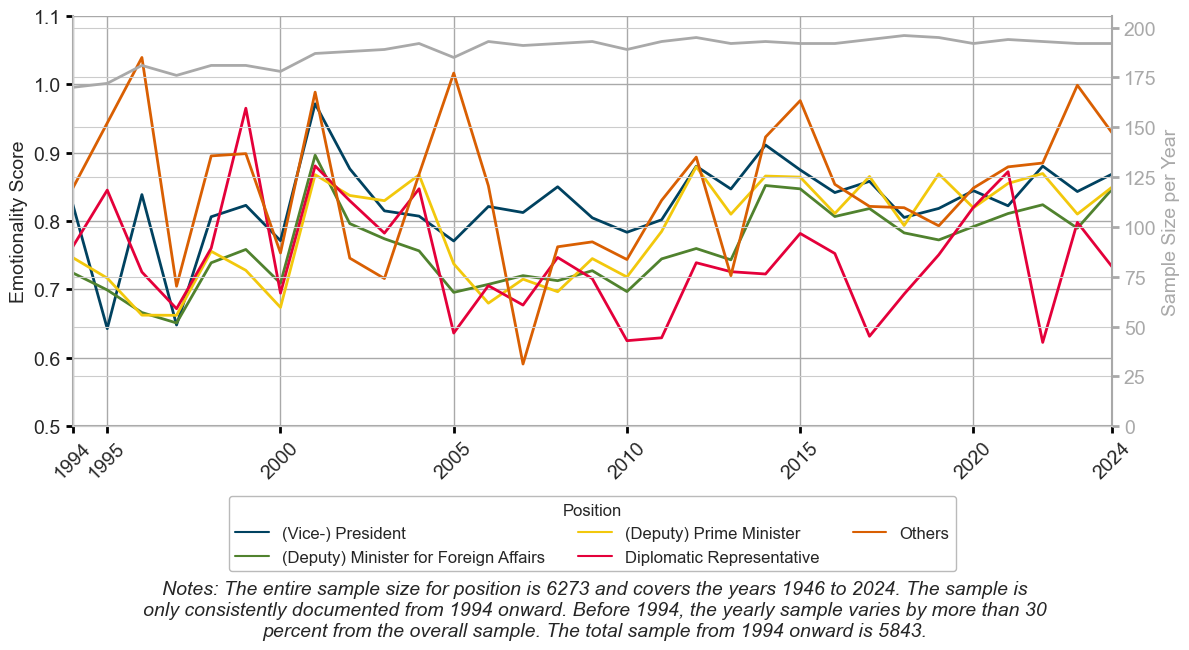

In [42]:
score_over_time_position = (
    un_corpus_scored
    .groupby(['year', 'position'])['score']
    .mean()
    .reset_index()
)

# Set the position order
score_over_time_position['position'] = pd.Categorical(
    score_over_time_position['position'],
    categories=top_positions,
    ordered=True
)


#score_over_time_position['position'] = score_over_time_position['position'].astype(str)

position_sample_size_per_year = (
    un_corpus_scored.groupby('year')['position'].count()
)

position_total = position_sample_size_per_year.sum()

fig, ax1 = plt.subplots(figsize=FIGSIZE)

sns.lineplot(
    data=score_over_time_position,
    x='year',
    y='score',
    hue='position',
    palette=CUSTOM_COLORS,
    linewidth=LINEWIDTH,
    ax=ax1
)

ax1.set_xlabel("")
ax1.set_ylabel("Emotionality Score", fontsize=AXIS_LABEL_FONT_SIZE)
ax1.set_ylim(Y_RANGE_EMOTIONALITY)
ax1.margins(y=AX_SET_Y_MARGIN)
ax1.set_xlim(1994, 2024)

tick_years_position = [1994] + list(range(1995, 2025, 5))
if 2024 not in tick_years_position:
    tick_years_position.append(2024)
ax1.set_xticks(tick_years_position)
ax1.set_xticklabels(tick_years_position, rotation=XTICK_ROTATION, fontsize=TICK_LABEL_FONT_SIZE)

ax1.tick_params(axis='y', which='both', left=True, right=False,
                direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH,
                color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE)
ax1.tick_params(axis='x', which='both', bottom=True, top=False,
                direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH,
                color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE)

ax1.spines['left'].set_color(SPINE_COLOR)
ax1.spines['left'].set_linewidth(SPINE_WIDTH)
ax1.spines['bottom'].set_color(SPINE_COLOR)
ax1.spines['bottom'].set_linewidth(SPINE_WIDTH)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.yaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)
ax1.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)

ax2 = ax1.twinx()
sns.lineplot(
    x=position_sample_size_per_year.index,
    y=position_sample_size_per_year.values,
    color='darkgrey',
    linewidth=LINEWIDTH,  
    ax=ax2
)
ax2.set_ylabel("Sample Size per Year", color='darkgrey', fontsize=AXIS_LABEL_FONT_SIZE)
ax2.tick_params(axis='y', colors='darkgrey', direction=TICK_DIRECTION,
                length=TICK_LENGTH, width=TICK_WIDTH, labelsize=TICK_LABEL_FONT_SIZE)
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color(SPINE_COLOR)
ax2.spines['right'].set_linewidth(SPINE_WIDTH)
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

ax1.legend(
    title="Position",
    title_fontsize=LEGEND_FONT_SIZE,
    fontsize=LEGEND_FONT_SIZE,
    loc=LEGEND_LOC,
    bbox_to_anchor=LEGEND_BBOX,
    ncol=LEGEND_NCOL,
    frameon=True,
    edgecolor=SPINE_COLOR,
    facecolor='white'
)

note_text = (
    f"Notes: The entire sample size for position is {position_total} and covers the years 1946 to 2024. "
    f"The sample is only consistently documented from 1994 onward. Before 1994, the yearly sample varies "
    f"by more than 30 percent from the overall sample. The total sample from 1994 onward is {position_total_1994}."
)

wrapped_text = "\n".join(textwrap.wrap(note_text, width=100))
plt.figtext(0.5, -0.07, wrapped_text, **FIG_NOTE_FONT)

sns.despine(left=False, right=False, top=True, bottom=False)
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'emotionality_score_over_time_position.png'), bbox_inches='tight')
plt.show()

### Cosine Similiarty of Words to the Centroids

Unique tokens: 9473
Corpus words (excluding affect/cognition dictionary): 8902


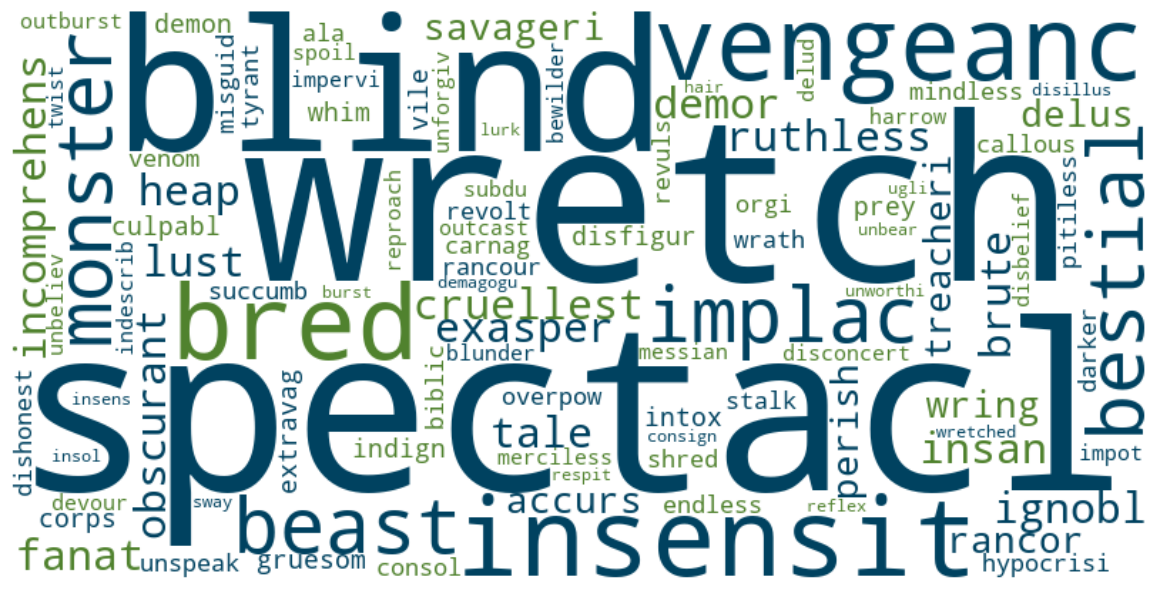

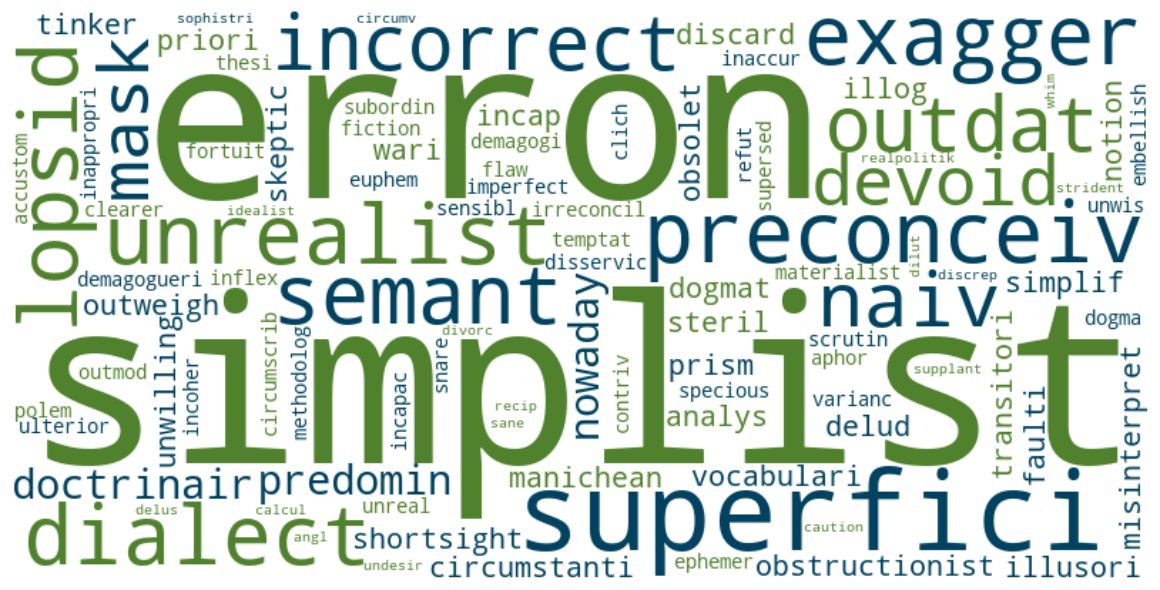

In [46]:
# Get unique tokens from speech_final and exclude dictionary words
def to_list(val):
    if isinstance(val, list):
        return val
    elif isinstance(val, str):
        try:
            return ast.literal_eval(val)
        except:
            return []
    else:
        return []

all_tokens = []
for val in un_corpus_scored['speech_final'].dropna():
    tokens = to_list(val)
    all_tokens.extend(tokens)

unique_tokens = list(set(all_tokens))

speech_length_tokens = all_tokens 
print(f"Unique tokens: {len(set(speech_length_tokens))}")
corpus_words = [word for word in unique_tokens if word not in affect_dic and word not in cognition_dic]

print(f"Corpus words (excluding affect/cognition dictionary): {len(corpus_words)}")

def word_similarity_to_centroid(word_list, centroid, model):
    similarities = {}
    for word in word_list:
        if word in model.wv:
            word_vec = model.wv[word]
            sim = 1 - cosine(word_vec, centroid)  # similarity = 1 - cosine distance
            similarities[word] = sim
    return similarities

# Cosine Similarity of affect dictionary to affect centroid
affect_dict_sim = word_similarity_to_centroid(affect_dic, affect_centroid, w2v)

# Cosine Similarity of cognition dictionary to cognition centroid
cognition_dict_sim = word_similarity_to_centroid(cognition_dic, cognition_centroid, w2v)

# Cosine Similarity of corpus words to affect centroid
corpus_words_sim_affect = word_similarity_to_centroid(corpus_words, affect_centroid, w2v)

# Cosine Similarity of corpus words to cognition centroid
corpus_words_sim_cognition = word_similarity_to_centroid(corpus_words, cognition_centroid, w2v)


def plot_wordcloud_from_sim(sim_dict, filename, top_n=100):
    sim_sorted = dict(sorted(sim_dict.items(), key=lambda x: x[1], reverse=True)[:top_n])

    colors_wordclouds = ['#50822E', '#004260']
    def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
        return random.choice(colors_wordclouds)

    wc = WordCloud(width=800, height=400, background_color='white', color_func=color_func)
    wc.generate_from_frequencies(sim_sorted)

    plt.figure(figsize=FIGSIZE)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout()
    
    os.makedirs(fig_dir, exist_ok=True)
    plt.savefig(os.path.join(fig_dir, filename), bbox_inches='tight')
    plt.show()

# Wordcloud highest cosine similarity of corpus words to affect centroid
plot_wordcloud_from_sim(corpus_words_sim_affect, "corpus_affect_wordcloud.png")

# Wordcloud highest cosine similarity of corpus words to cognition centroid
plot_wordcloud_from_sim(corpus_words_sim_cognition, "corpus_cognition_wordcloud.png")